In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

 

C:\Users\adm\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


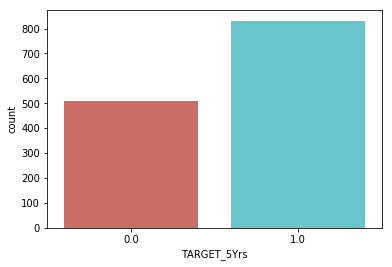

In [24]:
from sklearn.metrics import accuracy_score
link = "G:/Machine learning with python/nba_logreg.csv"
data = pd.read_csv(link)
#specification of input and output variables 
X = data.iloc[:, 16:20].values  
y = data.iloc[:, 20].values

sb.countplot(x='TARGET_5Yrs',data=data, palette='hls')




In [27]:
#print(X) 
# split the dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% trainset and 20% tes
# create logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
pred_logistic = model.predict(X_test)
#pred_logistic.shape   # dim of prediction
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_logistic)
 
acu_logistic = accuracy_score(y_test,pred_logistic)
#model.summary()  
#data.head()
#data.info()

model.coef_

array([[0.02902731, 0.3092726 , 0.95299253, 0.60123162]])

In [25]:
k=1000
mc = np.zeros(6)
for j in range(1,1000):
    result_array = np.array([])
    ratio=[0.4,0.5,0.6,0.7,0.8,0.9]
    for i in ratio:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)  
        model = LogisticRegression()
        model.fit(X_train, y_train)
        pred_logistic = model.predict(X_test)
    #pred_logistic.shape   # dim of prediction
        acu_logistic = accuracy_score(y_test,pred_logistic)
        result_array = np.append(result_array, acu_logistic)
    mc=mc+(1/k)*result_array
    
mc
     
        


array([0.63742164, 0.65904179, 0.63493657, 0.63901919, 0.64674067,
       0.62541045])

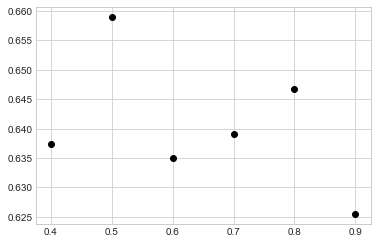

In [28]:
# performance plot 

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(ratio, mc, 'o', color='black');

In [12]:
# Example 2:  
data = pd.read_csv('dataset_GLM.csv')
data1 = data.dropna()   # missing values
#specification of input and output variables 
X = data.iloc[:, 16:20].values  
y = data.iloc[:, 20].values
#data1.head()

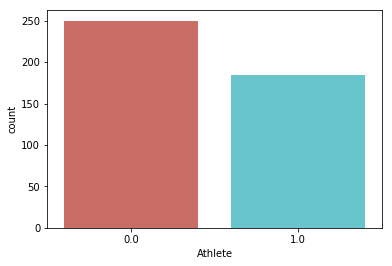

In [8]:
sb.countplot(x='Athlete',data=data1, palette='hls')

In [9]:
# split the dataset to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% trainset and 20% tes
 

In [22]:
# create logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
pred_logistic = model.predict(X_test)
#pred_logistic.shape   # dim of prediction
acu_logistic = accuracy_score(y_test,pred_logistic)
 


In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


AUC: 0.733


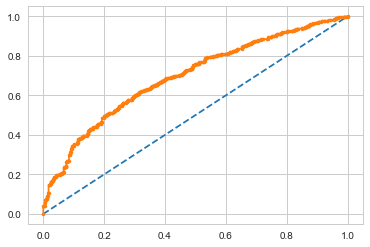

In [120]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()
#info: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [ ]:
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_logistic)
 

In [112]:
# for loop for performance prediction

link = "G:/Machine learning with python/nba_logreg.csv"
data = pd.read_csv(link)
    #specification of input and output variables 
X = data.iloc[:, 16:20].values  
y = data.iloc[:, 20].values
k=1000
mc = np.zeros(6)
for j in range(1,1000):
    result_array = np.array([])
    ratio=[0.4,0.5,0.6,0.7,0.8,0.9]
    for i in ratio:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)  
        model = LogisticRegression()
        model.fit(X_train, y_train)
        pred_logistic = model.predict(X_test)
    #pred_logistic.shape   # dim of prediction
        acu_logistic = accuracy_score(y_test,pred_logistic)
        result_array = np.append(result_array, acu_logistic)
    mc=mc+(1/k)*result_array
    
mc
     
        





array([0.63742164, 0.65904179, 0.63493657, 0.63901919, 0.64674067,
       0.62541045])

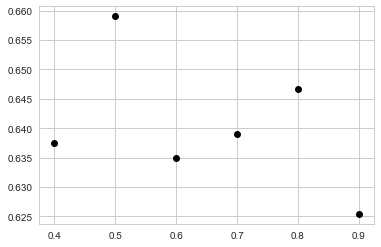

In [113]:
# performance plot 

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(ratio, mc, 'o', color='black');

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
#print('AUC: %.3f' % auc)
        

array([0.41455392, 0.53644759, 0.9768506 , 0.43856966, 0.80166539,
       0.51191592, 0.69222106, 0.80585437, 0.61440074, 0.60107169,
       0.65550394, 0.57768891, 0.83130719, 0.58629742, 0.75645269,
       0.67802882, 0.49065017, 0.958718  , 0.71811925, 0.51673206,
       0.6178747 , 0.8249306 , 0.55529   , 0.65449623, 0.83180897,
       0.6196839 , 0.5321664 , 0.53833015, 0.7740989 , 0.75027668,
       0.85344966, 0.62281344, 0.5345818 , 0.64884155, 0.73824333,
       0.65618771, 0.65615913, 0.82872624, 0.48451358, 0.71366002,
       0.71905635, 0.97186522, 0.74819663, 0.56756579, 0.54519166,
       0.74621548, 0.88968389, 0.48587792, 0.89144992, 0.48557484,
       0.52667445, 0.63537421, 0.43310642, 0.68915775, 0.51307371,
       0.62200806, 0.54124748, 0.63361662, 0.60205971, 0.55790805,
       0.45558297, 0.71360718, 0.49035743, 0.699135  , 0.67994516,
       0.63790902, 0.49214477, 0.50418626, 0.59366667, 0.66648992,
       0.49180834, 0.69909071, 0.5023563 , 0.5740412 , 0.77409

In [29]:
probs

array([0.41455392, 0.53644759, 0.9768506 , 0.43856966, 0.80166539,
       0.51191592, 0.69222106, 0.80585437, 0.61440074, 0.60107169,
       0.65550394, 0.57768891, 0.83130719, 0.58629742, 0.75645269,
       0.67802882, 0.49065017, 0.958718  , 0.71811925, 0.51673206,
       0.6178747 , 0.8249306 , 0.55529   , 0.65449623, 0.83180897,
       0.6196839 , 0.5321664 , 0.53833015, 0.7740989 , 0.75027668,
       0.85344966, 0.62281344, 0.5345818 , 0.64884155, 0.73824333,
       0.65618771, 0.65615913, 0.82872624, 0.48451358, 0.71366002,
       0.71905635, 0.97186522, 0.74819663, 0.56756579, 0.54519166,
       0.74621548, 0.88968389, 0.48587792, 0.89144992, 0.48557484,
       0.52667445, 0.63537421, 0.43310642, 0.68915775, 0.51307371,
       0.62200806, 0.54124748, 0.63361662, 0.60205971, 0.55790805,
       0.45558297, 0.71360718, 0.49035743, 0.699135  , 0.67994516,
       0.63790902, 0.49214477, 0.50418626, 0.59366667, 0.66648992,
       0.49180834, 0.69909071, 0.5023563 , 0.5740412 , 0.77409